<a href="https://colab.research.google.com/github/Alanoud-10/PROJECT_Data-Mining/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Importing the dataset - Downloading from Kaggle...
Path to dataset files: /root/.cache/kagglehub/datasets/ashaychoudhary/panic-attack-dataset/versions/1
Files in the downloaded directory: ['panic_attack_dataset.csv']
Dataset loaded successfully.

Step 2: Understanding the Dataset
The dataset consists of rows and columns containing various features related to panic attacks.
Rows: 1200, Columns: 21
Column names: ['ID', 'Age', 'Gender', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain', 'Trembling', 'Medical_History', 'Medication', 'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking', 'Therapy', 'Panic_Score']

Dropping ID column as it does not contribute to predictions.
ID column removed.

Data Types:
Age                         int64
Gender                     object
Panic_Attack_Frequency      int64
Duration_Minutes            int64
Trigger                    ob

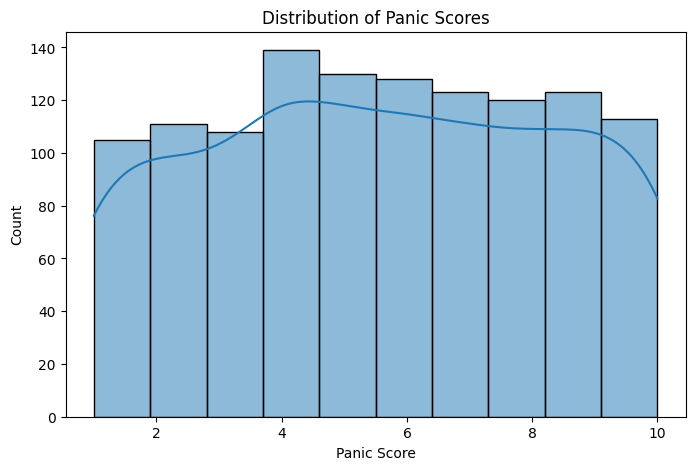

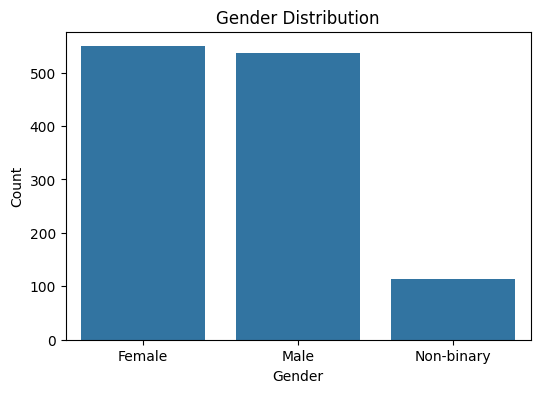

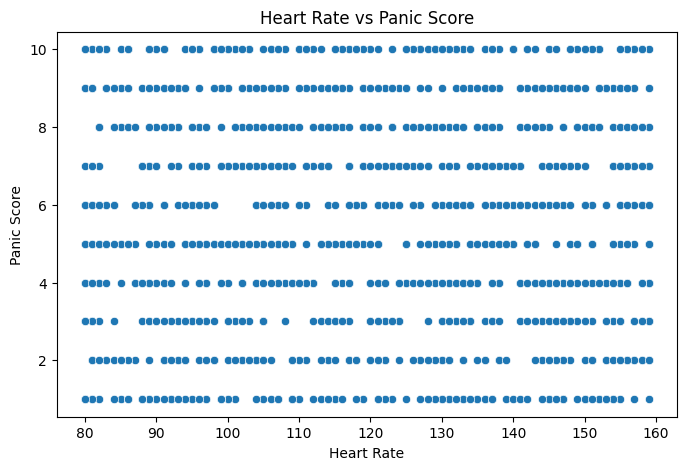


Step 6: Preprocessing Data
Handling missing values by replacing numerical features with median and categorical features with mode.
Dataset after handling missing values:
   Age      Gender  Panic_Attack_Frequency  Duration_Minutes   Trigger  \
0   56      Female                       9                 5  Caffeine   
1   46        Male                       8                 9    Stress   
2   32      Female                       6                31      PTSD   
3   60        Male                       5                20  Caffeine   
4   25  Non-binary                       6                10  Caffeine   

   Heart_Rate Sweating Shortness_of_Breath Dizziness Chest_Pain Trembling  \
0         134      Yes                  No       Yes        Yes        No   
1         139      Yes                 Yes        No         No        No   
2         141       No                 Yes       Yes         No        No   
3         109      Yes                 Yes        No         No       Yes   

In [ ]:
# Import necessary libraries
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats
from sklearn.feature_selection import VarianceThreshold

# Step 1: Import the dataset
print("Step 1: Importing the dataset - Downloading from Kaggle...")
path = kagglehub.dataset_download("ashaychoudhary/panic-attack-dataset")
print("Path to dataset files:", path)
print("Files in the downloaded directory:", os.listdir(path))

dataset_path = os.path.join(path, 'panic_attack_dataset.csv')

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")
        return None

data = load_dataset()

if data is not None:
    # Step 2: Dataset Overview
    print("\nStep 2: Understanding the Dataset")
    print("The dataset consists of rows and columns containing various features related to panic attacks.")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    print("Column names:", data.columns.tolist())

    # Drop ID column if it exists
    if 'ID' in data.columns:
        print("\nDropping ID column as it does not contribute to predictions.")
        data = data.drop(columns=['ID'])
        print("ID column removed.")

    print("\nData Types:")
    print(data.dtypes)
    print("\nMissing Values Before Handling:")
    print(data.isnull().sum())

    # Step 3: Statistical Summaries
    print("\nStep 3: Statistical Summary")
    print("We calculate statistical measures such as mean, variance, and percentiles to understand data distribution.")
    print(data.describe())

    # Step 4: Class Label Distribution (Detect Class Imbalance)
    print("\nStep 4: Analyzing Class Distribution")
    print("Checking the distribution of the class label to detect any imbalances in the dataset.")
    print(data['Medical_History'].value_counts())

    # Step 5: Data Visualization - Variable Distributions
    print("\nStep 5: Data Visualization")
    print("Generating plots to understand feature distributions and relationships.")
    plt.figure(figsize=(8, 5))
    sns.histplot(data['Panic_Score'], bins=10, kde=True)
    plt.title('Distribution of Panic Scores')
    plt.xlabel('Panic Score')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', data=data)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data['Heart_Rate'], y=data['Panic_Score'])
    plt.title('Heart Rate vs Panic Score')
    plt.xlabel('Heart Rate')
    plt.ylabel('Panic Score')
    plt.show()

    # Step 6: Data Preprocessing
    print("\nStep 6: Preprocessing Data")
    numerical_features = data.select_dtypes(include=['number']).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    # Handling Missing Values
    print("Handling missing values by replacing numerical features with median and categorical features with mode.")
    data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])
    print("Dataset after handling missing values:")
    print(data.head())

    # Outlier Detection & Removal
    print("\nDetecting and removing outliers using the Z-score method.")
    z_scores = stats.zscore(data[numerical_features])
    data = data[(abs(z_scores) < 3).all(axis=1)]
    print("Dataset after removing outliers:")
    print(data.head())

    # Encoding Categorical Variables
    print("\nEncoding categorical variables using Label Encoding.")
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    print("Dataset after encoding categorical variables:")
    print(data.head())

    # Normalization using Min-Max Scaling
    print("\nApplying Min-Max Scaling to normalize numerical features.")
    scaler = MinMaxScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    print("Dataset after normalization:")
    print(data.head())

    # Discretization
    print("\nApplying discretization to categorize Age, Heart Rate, and Panic Score.")
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 100], labels=[1, 2, 3, 4])
    data['Heart_Rate_Category'] = pd.cut(data['Heart_Rate'], bins=[0, 60, 100, 200], labels=[1, 2, 3])
    data['Panic_Level'] = pd.cut(data['Panic_Score'], bins=[0, 3, 6, 10], labels=[1, 2, 3])
    print("Dataset after discretization:")
    print(data.head())

    # Step 7: Feature Selection
    print("\nStep 7: Applying feature selection with Variance Threshold.")
    variance_threshold = 0.01
    selector = VarianceThreshold(threshold=variance_threshold)
    data_selected = selector.fit_transform(data[numerical_features])
    selected_features = data[numerical_features].columns[selector.get_support()]
    print("Features selected by Variance Threshold:", selected_features.tolist())
    data = data[selected_features]
    print("Dataset after feature selection:")
    print(data.head())

    # Step 8: Final Summary
    print("\nFinal Processed Dataset Overview")
    print("Dataset after all preprocessing steps:")
    print(data.head())


     # Summary of Preprocessing
    print("\nSummary of Data Preprocessing:")
    print("1. The dataset was loaded and an overview was generated.")
    print("2. Statistical analysis and visualizations were conducted to understand distributions and relationships.")
    print("3. Missing values were handled by replacing numerical values with the median and categorical values with the mode.")
    print("4. The ID column was removed as it does not contribute to predictions and can introduce artificial noise.")
    print("5. Outliers were detected and removed using the Z-score method.")
    print("6. Categorical variables were encoded using Label Encoding.")
    print("7. Numerical features were normalized using Min-Max Scaling.")
    print("8. Discretization was applied to categorize Age, Heart Rate, and Panic Score.")
    print("9. Feature selection was performed using Variance Thresholding to remove low-variance features.")
    print("10. The final processed dataset is now ready for analysis and machine learning applications.")